# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [ ]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:
# TODO
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';',index_col=0)

# Entender los datos
#print(list(ds.columns))
#print(ds.head(5))


max_price=ds.price.max()
most_expensive_house = ds[ds['price'] == max_price] # por si hubiera repetidos
address = most_expensive_house['address']

print(f"The house with address {address.values[0]} is the most expensive and its price is {max_price} EUR")



The house with address El Escorial is the most expensive and its price is 8500000 EUR


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
# TODO
non_zero_ds = ds[ds['price'] > 0] # No quiero las que sean 0, porque no es realista o no han puesto el precio
ds_clean_duplicated =non_zero_ds.drop_duplicates(subset=["description"]) # No quiero los anuncios duplicados
ds_filtered = ds_clean_duplicated[~ds_clean_duplicated["description"].str.contains("alquil", case=False, na=False)] # elimino todos los que sean alquiler
#ds_cleaned =ds_filtered.dropna(subset=['description'])
#print(ds_cleaned)
# NOTA: Existen valores Nan que al poner na=False los trata como False, pero está en los datos como NaN
#nan = ds_filtered["description"].isna().sum()  # es 1 solo, como no se la importancia, lo dejo pero si lo necesito tengo ds_cleaned
#print(nan)
#print(non_zero_ds.head(5))
#print(list(ds.columns))
#print(list(ds.iloc[0]))
min_price = ds_filtered.price.min(skipna=True)
most_cheapest_house = ds_filtered[ds_filtered['price'] == min_price]
#print(most_cheapest_house["description"])
address = most_cheapest_house['address']
print(f'The house with address {address.iloc[0]} is the cheapest and its price is {min_price} EUR')


The house with address Mayor, Los Santos de la Humosa is the cheapest and its price is 16200 EUR


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [5]:
# TODO
#print(ds.head(5))
#print(list(ds.columns))
#print(ds["surface"][0:5]) # puede haber NaN
# biggest house
biggest_surface = ds['surface'].max()
biggest_house = ds[ds['surface'] == biggest_surface]
# smallest house
smallest_surface = ds['surface'].min()
smallest_house = ds[ds['surface'] ==  smallest_surface]
# Sin filtrar
print(f"The biggest house is located on {biggest_house['address'].iloc[0]} and its surface is {biggest_house['surface'].iloc[0]} meters")
print(f"The smallest house is located on {smallest_house['address'].iloc[0]} and its surface is {smallest_house['surface'].iloc[0]} meters")

## Con el Dataset filtered comprobamos que muestra los mismos valores, pero al filtrar anteriormente por precio >0
## podía ser que uno de los que se han eliminado fuera uno de los de mayor superficie, no es el caso
biggest_surface_filtered = ds_filtered['surface'].max()
biggest_house_filtered = ds_filtered[ds_filtered['surface'] == biggest_surface_filtered]
# smallest house
smallest_surface_filtered = ds_filtered['surface'].min()
smallest_house_filtered = ds_filtered[ds_filtered['surface'] ==  smallest_surface_filtered]
print("# Dataset filtrado por precio")
print(f"The biggest house is located on {biggest_house_filtered['address'].iloc[0]} and its surface is {biggest_house_filtered['surface'].iloc[0]} meters")
print(f"The smallest house is located on {smallest_house_filtered['address'].iloc[0]} and its surface is {smallest_house_filtered['surface'].iloc[0]} meters")




The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters
# Dataset filtrado por precio
The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# TODO
#print(list(ds.columns))
#print(ds.head(15))
population = ds.groupby('level5')

print(population.size())
populations = list(population.groups.keys())
print(populations)


level5
 Madrid Capital          6643
Ajalvir                    17
Alcalá de Henares         525
Alcobendas                259
Alcorcón                  190
                         ... 
Villar del Olmo             7
Villarejo de Salvanés      19
Villaviciosa de Odón      166
Villavieja del Lozoya       6
Zarzalejo                   2
Length: 168, dtype: int64
[' Madrid Capital', 'Ajalvir', 'Alcalá de Henares', 'Alcobendas', 'Alcorcón', 'Aldea del Fresno', 'Algete', 'Alpedrete', 'Ambite', 'Anchuelo', 'Aranjuez', 'Arganda del Rey', 'Arroyomolinos (Madrid)', 'Batres', 'Becerril de la Sierra', 'Belmonte de Tajo', 'Boadilla del Monte', 'Braojos', 'Brea de Tajo', 'Brunete', 'Buitrago del Lozoya', 'Bustarviejo', 'Cabanillas de la Sierra', 'Cadalso de los Vidrios', 'Camarma de Esteruelas', 'Campo Real', 'Canencia', 'Carabaña', 'Casarrubuelos', 'Cenicientos', 'Cercedilla', 'Chapinería', 'Chinchón', 'Ciempozuelos', 'Cobeña', 'Collado Mediano', 'Collado Villalba', 'Colmenar Viejo', 'Colmenar de 

Observamos que en el length nos dice cuantos son: 168

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
# TODO
# PREGUNTAR
nan = ds.isna()
nan_sum = ds.isna().sum()
#print(nan)
print(nan_sum) # suma del numero de nans que hay por columna, para ver como de corruptos están los datos de cada columna


id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64


Suma del numero de nans que hay por columna, para ver como de corruptos están los datos de cada columna

#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [8]:
# TODO
ds_cleaned = ds.dropna(axis=1, how='all') # limpiamos las columnas con todo nan elimina 2 columnas
ds_cleaned_cols = ds_cleaned.dropna(axis=1, thresh=9000) # Se aplica un thresh de 9000 valores NO nulos para que los datos sean muchos

# print(list(ds_cleaned.columns))
# print(ds_cleaned_cols.isna().sum()) Utilizado para ver la cantidad de nulos y hacerse una idea de la relevancia de esa columna

print(ds_cleaned_cols) # Se observan 31 columnas de las 36 que había inicialmente

       id_realEstates  isNew                    realEstate_name  \
1           153771986  False            ferrari 57 inmobiliaria   
2           153867863  False  tecnocasa fuenlabrada ferrocarril   
3           153430440  False                 look find boadilla   
4           152776331  False  tecnocasa fuenlabrada ferrocarril   
5           153180188  False            ferrari 57 inmobiliaria   
...               ...    ...                                ...   
15331       153901377  False                infocasa consulting   
15332       150394373  False                inmobiliaria pulpon   
15333       153901397  False             tecnocasa torrelodones   
15334       152607440  False                inmobiliaria pulpon   
15335       153901356  False                infocasa consulting   

       phone_realEstate                                       url_inmueble  \
1           912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
2           916358736.0  https://www.fo

In [9]:
print(ds) # observamos que inicialmente tenía 36 columnas

       id_realEstates  isNew                    realEstate_name  \
1           153771986  False            ferrari 57 inmobiliaria   
2           153867863  False  tecnocasa fuenlabrada ferrocarril   
3           153430440  False                 look find boadilla   
4           152776331  False  tecnocasa fuenlabrada ferrocarril   
5           153180188  False            ferrari 57 inmobiliaria   
...               ...    ...                                ...   
15331       153901377  False                infocasa consulting   
15332       150394373  False                inmobiliaria pulpon   
15333       153901397  False             tecnocasa torrelodones   
15334       152607440  False                inmobiliaria pulpon   
15335       153901356  False                infocasa consulting   

       phone_realEstate                                       url_inmueble  \
1           912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
2           916358736.0  https://www.fo

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [10]:
# TODO

ds_arroyomolinos = ds.loc[ds["level5"] == "Arroyomolinos (Madrid)"]

print(ds_arroyomolinos["price"].mean())

294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

       id_realEstates  isNew                  realEstate_name  \
454         153843083  False                  akris arguelles   
608         153620088  False        100 home red inmobiliaria   
614         153478908  False               mares inmobiliaria   
708         153736961  False                         gm house   
853         153274493  False                         gm house   
...               ...    ...                              ...   
14062       152552173  False                    alfa villalba   
14629       153761470  False                ymar inmobiliaria   
14950       153280810  False                         locativo   
15020       152767314  False                 haya real estate   
15193       146831440  False  miranda servicios inmobiliarios   

       phone_realEstate                                       url_inmueble  \
454         911792694.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
608         912669623.0  https://www.fotocasa.es/es/comprar/viv

Text(0.5, 1.0, 'Histogram Price in Arroyomolinos')

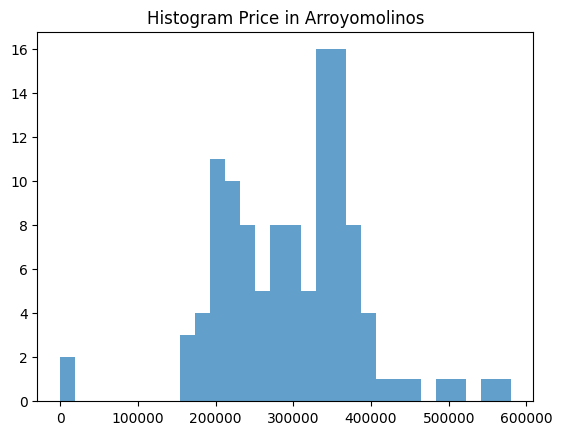

In [11]:
# TODO: Code
import matplotlib.pyplot as plt
ds_arroyomolinos = ds_arroyomolinos.drop_duplicates(subset="description") # elimino filas duplicadas que correspondan al mismo anuncio
print(ds_arroyomolinos)

plt.hist(ds_arroyomolinos['price'], bins = 30, alpha = 0.7)
plt.title("Histogram Price in Arroyomolinos")

In [12]:
print(ds_arroyomolinos["price"].describe())

count       115.000000
mean     298131.295652
std       90052.717170
min           0.000000
25%      229900.000000
50%      309000.000000
75%      349500.000000
max      580000.000000
Name: price, dtype: float64


In [13]:
import numpy as np
print(list(ds_arroyomolinos.columns))
print(ds_arroyomolinos.groupby('upperLevel').size())
percentile_75 = np.percentile(ds_arroyomolinos['price'], 75)
ds75_arroyomolinos_caros = ds_arroyomolinos[ds_arroyomolinos['price'] > percentile_75]
print('Superior al Percentile 75\n')
print(ds75_arroyomolinos_caros.groupby('upperLevel').size())
#print(ds_arroyomolinos[['upperLevel','level5']])
percentile_25 = np.percentile(ds_arroyomolinos['price'],25)
ds25_arroyomolinos_baratos = ds_arroyomolinos[ds_arroyomolinos['price'] < percentile_25]
print('Inferior al Percentile 25\n')
print(ds25_arroyomolinos_baratos.groupby('upperLevel').size())

['id_realEstates', 'isNew', 'realEstate_name', 'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface', 'price', 'date', 'description', 'address', 'country', 'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8', 'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id', 'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy', 'latitude', 'longitude', 'zipCode', 'customZone']
upperLevel
Centro y La Rinconada                     11
La Cárcaba - El Encinar - Montemolinos    22
Zona Bulevar y Europa                     46
Zona Las Castañeras                       18
Zona Zarzalejos                           18
dtype: int64
Superior al Percentile 75

upperLevel
Centro y La Rinconada                     5
La Cárcaba - El Encinar - Montemolinos    5
Zona Bulevar y Europa                     9
Zona Las Castañeras                       4
Zona Zarzalejos                           6
dtype: int64
Inferior al Percentile 25

upperLevel
Centro 

In [14]:
oferta_casas_baratas = ds_arroyomolinos[ (ds_arroyomolinos['price'] < percentile_25) & 
                          ( (ds_arroyomolinos['upperLevel'] == "Centro y La Rinconada") 
                           | (ds_arroyomolinos['upperLevel'] == "La Cárcaba - El Encinar - Montemolinos") 
                           | (ds_arroyomolinos['upperLevel'] == "Zona Zarzalejos"))
                            ]
print(oferta_casas_baratas[['price','upperLevel','surface']])

        price                              upperLevel  surface
855    220000                         Zona Zarzalejos    120.0
859    195000                   Centro y La Rinconada     75.0
1192   228000                         Zona Zarzalejos    120.0
5749   222000                         Zona Zarzalejos    120.0
6306   220000                   Centro y La Rinconada    100.0
11030  169900  La Cárcaba - El Encinar - Montemolinos     70.0


Se trata de una distribución normal, al tratarse de una gráfica que tiene forma de campana y es simetrica respecto a su media de 298131.
Se observa que del 75% de las casas tienen un precio de 349500 o menos, por lo que podría considerarse caras a partir de dicho valor.
Se obtienen aquellas casas superiores al percentile 75. Del total de casas en Arroyomolinos se observa una baja oferta de casas en Centro y La Rinconada (11)
siendo 5 de ellas superiores al percentil 75, aproximadamente el 45% del total,.
Por otro lado, el 25% de las casas tiene un valor de 229900 o menos, por lo que podría considerarse casas baratas.
En esta ocasión comprobamos que la oferta de casas es alta en "Zona Bulevar y Europa" y "Zona Las Castañeras", por lo que si estuvieramos interesados 
en comprar como inversión descartaríamos ambas zonas al tratarse de zonas con alta oferta de casas.
Como conclusión, si queremos comprar una casa barata y que se revalorice (menor oferta en una zona de casas caras) empezaríamos por el listado mostrado al final.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

Datos Valdemorillo: count    5.400000e+01
mean     3.578351e+05
std      1.814069e+05
min      1.030000e+05
25%      2.662500e+05
50%      3.155000e+05
75%      3.963500e+05
max      1.350000e+06
Name: price, dtype: float64
Error Media Valdemorillo: 24686.355959654495
Límite inferior Valdemorillo: 333148.7736699751
Límite superior Valdemorillo: 382521.4855892841
Datos Galapagar: count        75.000000
mean     355417.453333
std      186644.313761
min       79900.000000
25%      216214.000000
50%      350000.000000
75%      427500.000000
max      995000.000000
Name: price, dtype: float64
Error Media Galapagar: 21551.828958480557
Límite inferior Galapagar: 333865.62437485275
Límite superior Galapagar: 376969.28229181387


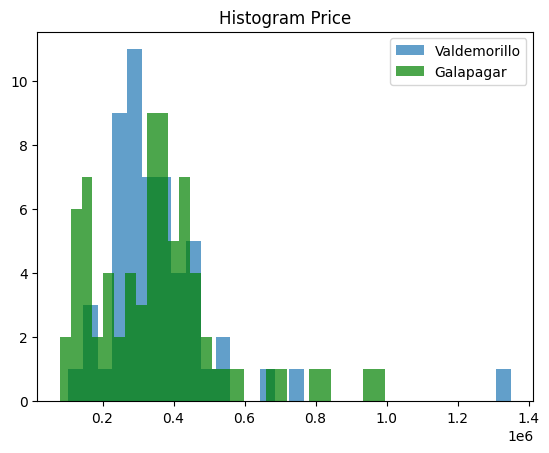

In [15]:
# TODO
import numpy as np
## VALDEMORILLO
ds_valdemorillo = ds.loc[ds["level5"] == "Valdemorillo"]
ds_valdemorillo = ds_valdemorillo.drop_duplicates(subset="description") # Elimino duplicados
std_valdemorillo = np.std(ds_valdemorillo["price"], ddof=1) # Calculo la desviación típica de Valdemorillo
count_valdemorillo = ds_valdemorillo['price'].count()   # N número total de las muestras
error_estandar_valdemorillo = std_valdemorillo/np.sqrt(count_valdemorillo)  # error estandar

## GALAPAGAR
ds_galapagar = ds.loc[ds['level5'] == "Galapagar"]
ds_galapagar = ds_galapagar.drop_duplicates(subset="description")   # Elimino duplicados
std_galapagar = np.std(ds_galapagar["price"], ddof=1)   # Calculo la desviación típica de Galapagar
count_galapagar = ds_galapagar['price'].count()     # N número total de las muestras
error_estandar_galapagar = std_galapagar/np.sqrt(count_galapagar)   # error estandar

##
print("Datos Valdemorillo:",ds_valdemorillo["price"].describe())
print("Error Media Valdemorillo:",error_estandar_valdemorillo) 
print("Límite inferior Valdemorillo:",ds_valdemorillo["price"].mean()-error_estandar_valdemorillo)
print("Límite superior Valdemorillo:",ds_valdemorillo["price"].mean()+error_estandar_valdemorillo)

print("Datos Galapagar:",ds_galapagar["price"].describe())
print("Error Media Galapagar:",error_estandar_galapagar)
print("Límite inferior Galapagar:",ds_galapagar["price"].mean()-error_estandar_galapagar)
print("Límite superior Galapagar:",ds_galapagar["price"].mean()+error_estandar_galapagar)

## Plots
plt.hist(ds_valdemorillo['price'], bins = 30, alpha = 0.7)
plt.hist(ds_galapagar['price'], bins = 30, alpha = 0.7, color="green")
plt.title("Histogram Price")
plt.legend(["Valdemorillo","Galapagar"])

Las medias son muy similares (variación de 3000€ de uno respecto al otro). Pero es posible que se deba a que tenemos valores muy grandes alejados de la media.
Si calculamos el error siendo este error igual a desviación estandar de las mediciones dividido entre la raíz cuadrada de N, siendo N la cantidad de mediciones. 
Posteriormente, si a la media obtenida le sumamos y restamos el error, obtendríamos el rango medio en el que se encuentran la mayoría de las casas de las respectivas zonas. 
Por tanto, comprar por debajo de la media menos el error estandar, en principio estarías comprando más barato que en la media del mercado. Por otro lado, si compraras por encima de la media
más el error estandar, en principio estarías comprando por encima de la media del mercado. Tras calcular el error en ambas zonas, si vemos el límite superior observamos que Valdemorillo es aproximadamente 5000€ más caro, pero viendo el valor de las casas se puede considerar despreciable. Por lo que sí, el precio medio de Valdemorillo y Galapagar es el mismo.


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [16]:
# TODO

#print(ds_valdemorillo[['price','surface','rooms','bathrooms','accuracy']])
ds_valdemorillo['pps'] = ds_valdemorillo["price"]/ds_valdemorillo['surface']
print("Precio medio por metro cuadrado Valdemorillo:",ds_valdemorillo['pps'].mean())
print("Superficie media en Valdemorillo",ds_valdemorillo['surface'].mean())
#print(ds_galapagar[['price','surface','rooms','bathrooms','accuracy']])
ds_galapagar['pps'] = ds_galapagar["price"]/ds_galapagar['surface']
print("Precio medio por metro cuadrado Galapagar", ds_galapagar['pps'].mean())
print("Superficie media en Galapagar", ds_galapagar['surface'].mean())

Precio medio por metro cuadrado Valdemorillo: 1306.4316387458725
Superficie media en Valdemorillo 335.2244897959184
Precio medio por metro cuadrado Galapagar 1573.092217815374
Superficie media en Galapagar 317.1666666666667


Se observa que pese a tener valores de superficie media similares (en Valdemorillo un poco mayor) en realidad 
es más barato Valdemorillo si se compara el precio medio por metro cuadrado respecto a Galapagar. 
Porque a mayor cantidad de metros cuadrados de media en superficie que hay en Valdemorillo se está pagando menos el metro cuadrado que en Galapagar. 

#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

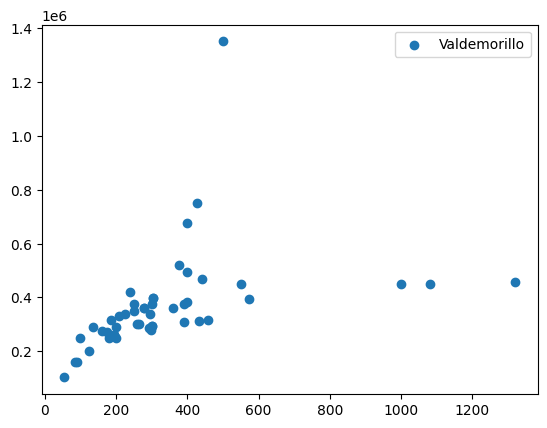

In [17]:
# TODO: Code
ds_valdemorillo_filtrado = ds_valdemorillo.dropna(subset='surface') # limpio los valores en los que la superficie es nan
x1=ds_valdemorillo_filtrado['surface']
y1=ds_valdemorillo_filtrado['price']

plt.figure()
plt.scatter(x1,y1, label="Valdemorillo")
plt.legend()




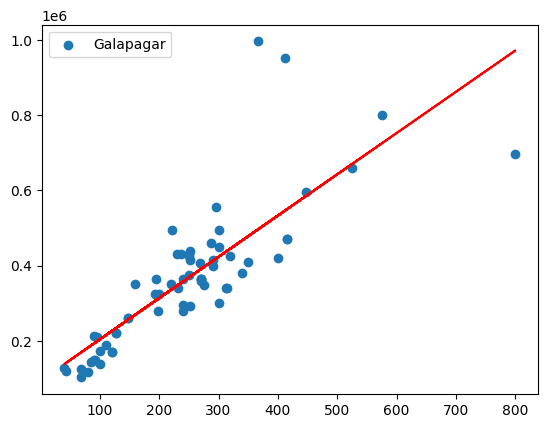

In [18]:
ds_galapagar_excluido = ds_galapagar[ds_galapagar['surface'] < 4000] # se excluye el valor que es de aproximadamente 5000 para poder ver la tendencia de forma correcta y poder comparar
x2 = ds_galapagar_excluido['surface']
y2 = ds_galapagar_excluido['price']
m, b = np.polyfit(x2, y2, 1)
trendline = m * x2 + b # formula de tendencia lineal
plt.scatter(x2,y2, label="Galapagar")
plt.plot(x2,trendline, color="red")
plt.legend()

Observamos que en Galapagar se produce una tendencia lineal de subida de precios conforme aumenta la superficie cuadrada, 
por otro lado, en Valdemorillo (tras un filtrado de aquellos que están muy por encima del precio de mercado) tiende a una constante (tendencia logarítmica) conforme aumenta la superficie el precio no se ve muy afectado.
Como conclusión, entiendo que los que están por debajo de la línea de tendencia en Galapagar presentan un precio/superficie más barato. Pero vamos a encontrar pisos con mayor superficie en relación a su precio más barato en Valdemorillo.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [19]:
# TODO
#print(list(ds.columns))

ds_filtered = ds.dropna(subset="realEstate_name")
real_estate_agencies = ds_filtered.groupby('realEstate_name')
print(len(real_estate_agencies))

1821


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [20]:
# TODO
population = ds['level5'].value_counts()
most_populated = population.idxmax()
most_houses = population.max()
print(most_populated,":", most_houses)

 Madrid Capital : 6643


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [21]:
# TODO
subset_ds = ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]) # Table of true or false
ds_south_belt = ds[subset_ds]
print(ds_south_belt)

       id_realEstates  isNew                            realEstate_name  \
2           153867863  False          tecnocasa fuenlabrada ferrocarril   
4           152776331  False          tecnocasa fuenlabrada ferrocarril   
86          153152077  False                    sinergical inmobiliaria   
95          153995577  False                            viviendas365com   
110         153586414  False            area uno asesores inmobiliarios   
...               ...    ...                                        ...   
15276       153903887  False  aliseda servicios de gestion inmobiliaria   
15292       151697757  False                                    unipiso   
15306       153902389  False                             jadein ferrero   
15323       153871864  False                          gestion comercial   
15326       153901467  False                              montehogar 68   

       phone_realEstate                                       url_inmueble  \
2           916358736

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

             count           mean            std      min       25%       50%  \
level5                                                                          
Alcorcón     190.0  230071.052632  126284.702094  91500.0  136700.0  179500.0   
Fuenlabrada  233.0  177198.021459   68563.989823  89000.0  135000.0  155000.0   
Getafe       290.0  265040.500000  144853.946450      0.0  134990.0  285305.0   
Leganés      194.0  208682.010309  109150.996530  60000.0  128000.0  169950.0   

                  75%        max  
level5                            
Alcorcón     298000.0   950000.0  
Fuenlabrada  198000.0   490000.0  
Getafe       371675.0  1050000.0  
Leganés      272475.0   650000.0  


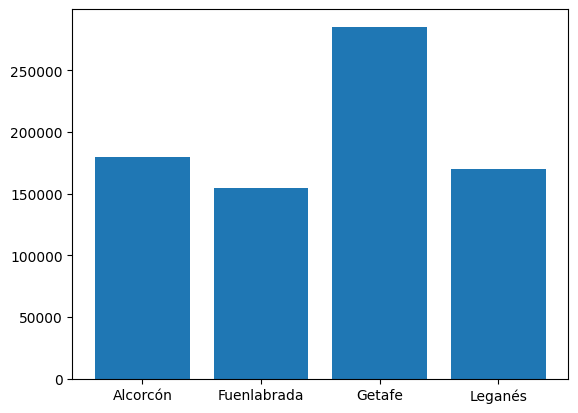

In [22]:
# TODO: Code

median_prices = ds_south_belt.groupby("level5")["price"].median()
plt.bar(median_prices.index, median_prices.values)
print(ds_south_belt.groupby("level5")["price"].describe())



Se observa que la mediana de precios en Getafe es mucho mayor respecto a las medianas de Alcorcón, Leganés y Fuenlabrada. 
En ocasiones la media puede verse afectada por los datos extremos, en cambio la mediana toma la posición del medio de los valores ordenados en un conjunto de datos.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [23]:
# TODO
## MEDIA
price_mean = ds_south_belt.groupby("level5")["price"].mean()
room_mean = ds_south_belt.groupby("level5")["rooms"].mean()
surface_mean = ds_south_belt.groupby("level5")["surface"].mean()
bathrooms_mean = ds_south_belt.groupby("level5")["bathrooms"].mean()
print(price_mean, room_mean, surface_mean, bathrooms_mean)

level5
Alcorcón       230071.052632
Fuenlabrada    177198.021459
Getafe         265040.500000
Leganés        208682.010309
Name: price, dtype: float64 level5
Alcorcón       2.914894
Fuenlabrada    3.025974
Getafe         3.151724
Leganés        2.906736
Name: rooms, dtype: float64 level5
Alcorcón       105.913295
Fuenlabrada    103.624365
Getafe         126.896266
Leganés        105.852273
Name: surface, dtype: float64 level5
Alcorcón       1.623656
Fuenlabrada    1.445415
Getafe         1.865052
Leganés        1.518135
Name: bathrooms, dtype: float64


In [24]:
## VARIANZA
price_variance = ds_south_belt.groupby("level5")["price"].var()
room_variance = ds_south_belt.groupby("level5")["rooms"].var()
surface_variance = ds_south_belt.groupby("level5")["surface"].var()
bathrooms_variance = ds_south_belt.groupby("level5")["bathrooms"].var()
print(price_variance,room_variance, surface_variance, bathrooms_variance)

level5
Alcorcón       1.594783e+10
Fuenlabrada    4.701021e+09
Getafe         2.098267e+10
Leganés        1.191394e+10
Name: price, dtype: float64 level5
Alcorcón       0.933895
Fuenlabrada    0.355844
Getafe         0.772748
Leganés        0.824590
Name: rooms, dtype: float64 level5
Alcorcón       4244.323834
Fuenlabrada    2264.643893
Getafe         5828.110028
Leganés        3987.475195
Name: surface, dtype: float64 level5
Alcorcón       0.592735
Fuenlabrada    0.353367
Getafe         0.658809
Leganés        0.553055
Name: bathrooms, dtype: float64


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [25]:
# TODO
most_expensive_house_south_belt = ds_south_belt.groupby("level5")[['price','address']]
print(most_expensive_house_south_belt.max())

               price                                            address
level5                                                                 
Alcorcón      950000                      Travesia Nuncio del, Alcorcón
Fuenlabrada   490000  Urbanización Urbanización Parque Miraflores, 5...
Getafe       1050000                           San Sebastián, 1, Getafe
Leganés       650000     Plaza Pza España, Gran Oportunidad!!!, Leganés


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

/tmp/ipykernel_511/3201348625.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Alcorcón")
/tmp/ipykernel_511/3201348625.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title="Fuenlabrada")
/tmp/ipykernel_511/3201348625.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend(title="Getafe")
/tmp/ipykernel_511/3201348625.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[3].legend(title="Leganés")


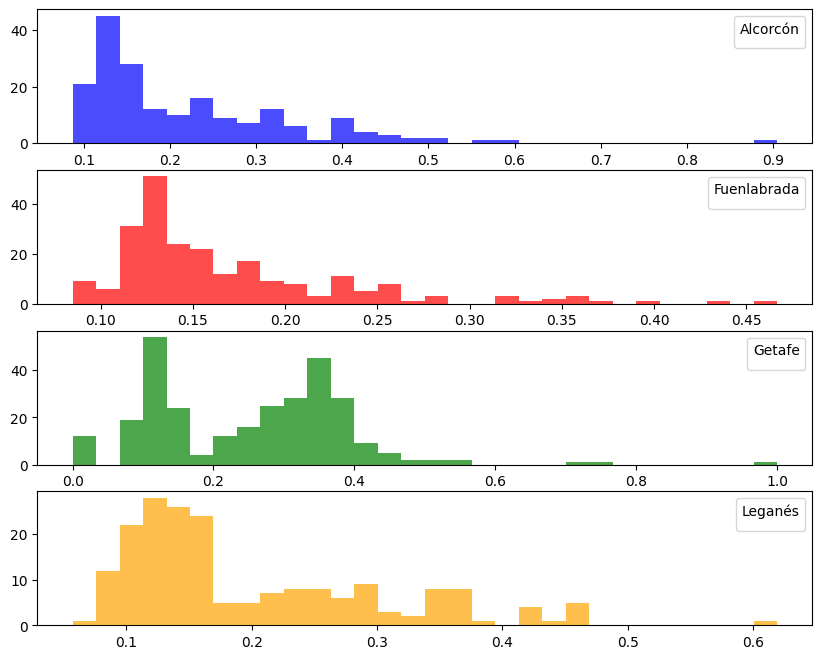

In [26]:
# TODO
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,1, figsize=(10,8))

ds_normalized = ds_south_belt.copy()

for col in ds_south_belt.select_dtypes(include=['number']).columns:
    X_min = ds_south_belt[col].min()
    X_max = ds_south_belt[col].max()
    # Xnorm = (x - Xmin)/(Xmax-Xmin)
    ds_normalized[col] = ((ds_south_belt[col]) - X_min) / (X_max - X_min)

# Hist
axes[0].hist(ds_normalized.loc[ds_normalized['level5'] == "Alcorcón", 'price'], bins=30, alpha=0.7, color="blue")
axes[0].legend(title="Alcorcón")
axes[1].hist(ds_normalized.loc[ds_normalized['level5'] == "Fuenlabrada", 'price'], bins=30, alpha=0.7, color="red")
axes[1].legend(title="Fuenlabrada")
axes[2].hist(ds_normalized.loc[ds_normalized['level5'] == "Getafe", 'price'], bins=30, alpha=0.7, color="green")
axes[2].legend(title="Getafe")
axes[3].hist(ds_normalized.loc[ds_normalized['level5'] == "Leganés", 'price'], bins=30, alpha=0.7, color="orange")
axes[3].legend(title="Leganés")


Se observa que Alcorcón, Fuenlabrada y Leganés siguen una distribución sesgada positivamente, en la que la mayoría de los valores se concentran en el lado izquierdo
y una larga cola de valores hacia la izquierda. En cambio en Getafe parece que sigue una distribución bimodal, con dos picos en la que se concentran la gran mayoría de los valores.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

count     241.000000
mean     2066.314949
std       741.872702
min         0.000000
25%      1684.285714
50%      1973.333333
75%      2628.787879
max      3827.160494
Name: pps, dtype: float64
count     173.000000
mean     2239.302480
std       539.951527
min       604.761905
25%      1904.081633
50%      2207.792208
75%      2472.727273
max      3698.159509
Name: pps, dtype: float64


/tmp/ipykernel_977/4051128744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_south_belt_cleaned['pps'] = ds_south_belt_cleaned['price']/ds_south_belt_cleaned['surface'] # nueva columna price per square
/tmp/ipykernel_977/4051128744.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(title="Getafe")
/tmp/ipykernel_977/4051128744.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title="Alcorcón")


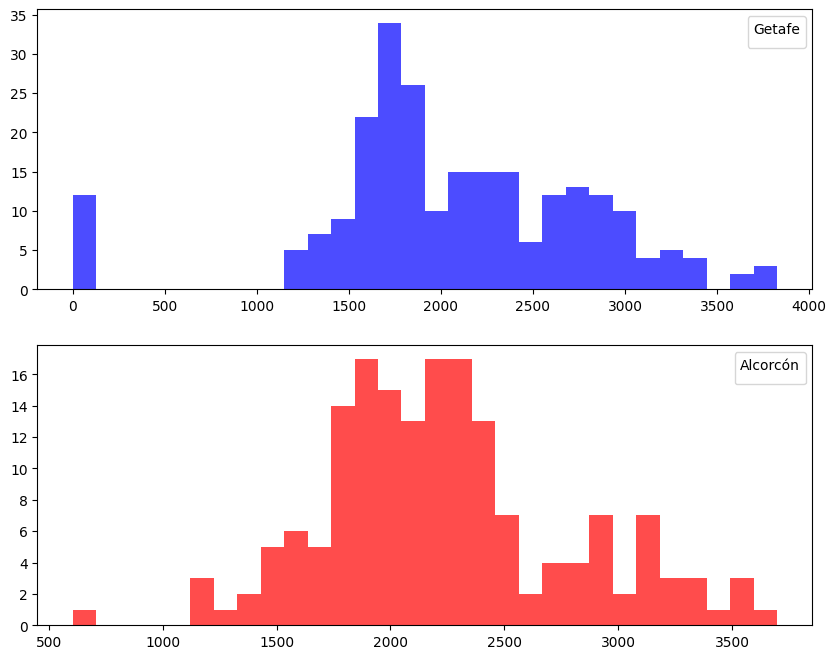

In [92]:
# TODO
ds_south_belt = ds[ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])].copy() 
# Para prevenir el error de SettingWithCopyWarning, ocurre al intentar asignar valores a una vista de un DataFrame en lugar de a una copia. 
# Esto sucede cuando el DataFrame ha sido generado a partir de un subconjunto de otro DataFrame usando un filtro
ds_south_belt_cleaned = ds_south_belt.dropna(subset="surface")  # limpio los que en surface son Nan
ds_south_belt_cleaned['pps'] = ds_south_belt_cleaned['price']/ds_south_belt_cleaned['surface'] # nueva columna price per square
print(ds_south_belt_cleaned.loc[ds_south_belt_cleaned['level5'] == "Getafe", 'pps'].describe())
print(ds_south_belt_cleaned.loc[ds_south_belt_cleaned['level5'] == "Alcorcón", 'pps'].describe())
fig, axes = plt.subplots(2,1, figsize=(10,8))
axes[0].hist(ds_south_belt_cleaned.loc[ds_south_belt_cleaned['level5'] == "Getafe", 'pps'], bins=30, alpha=0.7, color="blue")
axes[0].legend(title="Getafe")
axes[1].hist(ds_south_belt_cleaned.loc[ds_south_belt_cleaned['level5'] == "Alcorcón", 'pps'], bins=30, alpha=0.7, color="red")
axes[1].legend(title="Alcorcón")

El precio por metro cruadrado de media en Getafe es 2066.31, siendo más barato en media que en Alcorcón que es de 2239.30

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

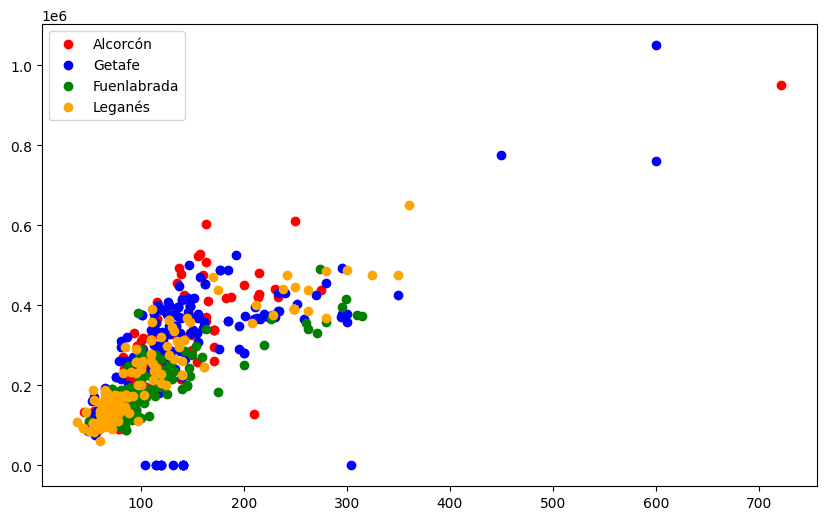

In [91]:
# TODO
alcorcon = ds_south_belt_cleaned[ds_south_belt_cleaned['level5'] == 'Alcorcón']
getafe = ds_south_belt_cleaned[ds_south_belt_cleaned['level5'] == 'Getafe']
fuenlabrada = ds_south_belt_cleaned[ds_south_belt_cleaned['level5'] == 'Fuenlabrada']
leganes = ds_south_belt_cleaned[ds_south_belt_cleaned['level5'] == 'Leganés']

plt.figure(figsize=(10, 6))
plt.scatter(alcorcon['surface'], alcorcon['price'], color='red', label='Alcorcón')
plt.scatter(getafe['surface'], getafe['price'], color='blue', label='Getafe')
plt.scatter(fuenlabrada['surface'], fuenlabrada['price'], color='green', label='Fuenlabrada')
plt.scatter(leganes['surface'], leganes['price'], color='orange', label='Leganés')
plt.legend()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [27]:
from ipyleaflet import Map, basemaps
# Map centered on (40.4168 degrees latitude and -3.7038 degrees longitude)
# Latitude, longitude
map = Map(center = (40.4168, -3.7038), zoom = 10, min_zoom = 1, max_zoom = 20, basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [28]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
from ipyleaflet import Marker, AwesomeIcon, Popup
from ipywidgets import HTML
mapa = {
    "latitude" : ds_south_belt['latitude'],
    "longitude" : ds_south_belt['longitude'],
    "address": ds_south_belt['address'],
    "population": ds_south_belt["level5"]
}
latitudes = mapa["latitude"]
longitudes = mapa["longitude"]
direcciones = mapa["address"]
population = mapa["population"]

def get_color(population):
    if population == "Alcorcón":
        return "red"
    elif population == "Getafe":
        return "blue"
    elif population == "Fuenlabrada":
        return "green"
    elif population == "Leganés":
        return "orange"

for lat, long, dir, color in zip(latitudes, longitudes, direcciones, population):
    # popup
    address = HTML()
    address.value = dir
    # marker color
    marker_color = get_color(color) 
    icon1 = AwesomeIcon(marker_color=marker_color)

    marker = Marker(location=(lat.replace(",","."), long.replace(",",".")),title=dir, icon=icon1)
    marker.popup = address
    # new layer
    map.add(marker)
    print(lat, long)
print("Finalizado")


40,28674 -3,79351
40,2853785786438 -3,79508142135624
40,35059 -3,82693
40,31933 -3,77574
40,3313411 -3,8313868
40,2744807718156 -3,79192471504211
40,31111 -3,73066
40,356919 -3,77769
40,3274 -3,77152
40,2906814213562 -3,80405242135624
40,3152529585 -3,8365174323
40,2921796 -3,815865
40,3060558 -3,7346649
40,3035689 -3,7381336
40,29224 -3,83833
40,3068987 -3,725108
40,3142811864376 -3,79168641356237
40,31381 -3,83733
40,32124 -3,7798
40,35524 -3,78003
40,28327 -3,74772
40,29742 -3,80916
40,3034957864376 -3,72721421356237
40,30779 -3,73801
40,33686 -3,75523
40,30184 -3,72799
40,30091 -3,73093
40,33252 -3,77006
40,30635 -3,72887
40,3220051387 -3,7130324135
40,3153084 -3,7324561
40,3133562 -3,8360052
40,3012757864376 -3,72873421356237
40,3218 -3,71263
40,27782 -3,80908
40,3164257864376 -3,77228421356237
40,3262 -3,73377
40,3216444213562 -3,78003122135624
40,30353 -3,73817
40,3117642135624 -3,71427578643763
40,31313 -3,71922
40,3099157864376 -3,72196421356237
40,3526 -3,81587
40,29190821356